# Raw EEG-Based Motor Intention Classification Using CNNs

This notebook focuses on analyzing EEG (electroencephalography) data to classify motor intentions—essentially detecting which hand a person intends to move based on their brain activity. EEG is a non-invasive method of recording electrical activity of the brain using sensors placed on the scalp.

In this notebook, we preprocess raw EEG data, train a Convolutional Neural Network (CNN) to classify motor intentions, and visualize the correct and misclassified samples of left vs right hand intent using topographic maps along a timeline of 1.5 seconds.

### Import packages

In [ ]:
%%capture
!pip install mne
!pip install tensorflow

In [ ]:
%%capture
import gc
import mne
import os
import matplotlib.pyplot as plt
import numpy as np
import mne
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from mne.decoding import CSP


from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

# Set the random seed for NumPy
np.random.seed(42)

## Preprocessing the EEG Data

EEG data often contains noise and irrelevant information from muscle movements (like eye blinks), which need to be removed before any meaningful analysis can occur. In this step, we preprocess the raw EEG data from `.fif` format to structured inputs (`X` and `y`), which will be fed into the CNN model.

The preprocessing steps involve:
1. Loading the raw EEG data.
2. Dropping irrelevant channels (like muscle movement).
3. Splitting the data into features (`X`) and labels (`y`), where `X` represents the EEG signals and `y` represents the corresponding motor intention - caused by directing the person to imagine of left or right hand movement. 


In [ ]:
#read eeg data from source file

import os
import mne

# Define the base path
base_path = "/content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/all_zip/BCI Database/Signals/DATA A/0_all_online/"

# Define the list of files
files = [os.path.join(base_path, "0_combined_raw_all_patients_ONLINE_ONLY-" + str(i) + ".fif") for i in range(4)]
print ("files FILES", files)
# Initialize an empty list to hold the raw data objects
raws = []

# Loop over the files
for file in files:

    print ("fir file in for loop files, file just added to RAW",file)

    # Read the raw data from the file
    raw = mne.io.read_raw_fif(file, preload=False)
    # Append the raw data object to the list
    raws.append(raw)


# Concatenate the raw data objects
combined_raw = mne.concatenate_raws(raws)


raw = combined_raw


files FILES ['/content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/all_zip/BCI Database/Signals/DATA A/0_all_online/0_combined_raw_all_patients_ONLINE_ONLY-0.fif', '/content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/all_zip/BCI Database/Signals/DATA A/0_all_online/0_combined_raw_all_patients_ONLINE_ONLY-1.fif', '/content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/all_zip/BCI Database/Signals/DATA A/0_all_online/0_combined_raw_all_patients_ONLINE_ONLY-2.fif', '/content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/all_zip/BCI Database/Signals/DATA A/0_all_online/0_combined_raw_all_patients_ONLINE_ONLY-3.fif']
fir file in for loop files, file just added to RAW /content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/all_zip/BCI Database/Signals/DATA A/0_all_online/0_combined_raw_all_patients_ONLINE_ONLY-0.fif
Opening raw data file /content/drive/MyDrive

<ipython-input-3-04c90c4e0c35>:21: RuntimeWarning: This filename (/content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/all_zip/BCI Database/Signals/DATA A/0_all_online/0_combined_raw_all_patients_ONLINE_ONLY-0.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=False)


Isotrak not found
    Range : 0 ... 16759295 =      0.000 ... 32732.998 secs
Ready.
Opening raw data file /content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/all_zip/BCI Database/Signals/DATA A/0_all_online/0_combined_raw_all_patients_ONLINE_ONLY-1.fif...
Isotrak not found
    Range : 16759296 ... 33518591 =  32733.000 ... 65465.998 secs
Ready.
Opening raw data file /content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/all_zip/BCI Database/Signals/DATA A/0_all_online/0_combined_raw_all_patients_ONLINE_ONLY-2.fif...
Isotrak not found
    Range : 33518592 ... 50277887 =  65466.000 ... 98198.998 secs
Ready.
Opening raw data file /content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/all_zip/BCI Database/Signals/DATA A/0_all_online/0_combined_raw_all_patients_ONLINE_ONLY-3.fif...
Isotrak not found
    Range : 50277888 ... 53402623 =  98199.000 ... 104301.998 secs
Ready.
fir file in for loop files, file just a

<ipython-input-3-04c90c4e0c35>:21: RuntimeWarning: This filename (/content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/all_zip/BCI Database/Signals/DATA A/0_all_online/0_combined_raw_all_patients_ONLINE_ONLY-1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=False)


Isotrak not found
    Range : 16759296 ... 33518591 =  32733.000 ... 65465.998 secs
Ready.
Opening raw data file /content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/all_zip/BCI Database/Signals/DATA A/0_all_online/0_combined_raw_all_patients_ONLINE_ONLY-2.fif...
Isotrak not found
    Range : 33518592 ... 50277887 =  65466.000 ... 98198.998 secs
Ready.
Opening raw data file /content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/all_zip/BCI Database/Signals/DATA A/0_all_online/0_combined_raw_all_patients_ONLINE_ONLY-3.fif...
Isotrak not found
    Range : 50277888 ... 53402623 =  98199.000 ... 104301.998 secs
Ready.
fir file in for loop files, file just added to RAW /content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/all_zip/BCI Database/Signals/DATA A/0_all_online/0_combined_raw_all_patients_ONLINE_ONLY-2.fif
Opening raw data file /content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_f

<ipython-input-3-04c90c4e0c35>:21: RuntimeWarning: This filename (/content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/all_zip/BCI Database/Signals/DATA A/0_all_online/0_combined_raw_all_patients_ONLINE_ONLY-2.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=False)


Isotrak not found
    Range : 33518592 ... 50277887 =  65466.000 ... 98198.998 secs
Ready.
Opening raw data file /content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/all_zip/BCI Database/Signals/DATA A/0_all_online/0_combined_raw_all_patients_ONLINE_ONLY-3.fif...
Isotrak not found
    Range : 50277888 ... 53402623 =  98199.000 ... 104301.998 secs
Ready.
fir file in for loop files, file just added to RAW /content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/all_zip/BCI Database/Signals/DATA A/0_all_online/0_combined_raw_all_patients_ONLINE_ONLY-3.fif
Opening raw data file /content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/all_zip/BCI Database/Signals/DATA A/0_all_online/0_combined_raw_all_patients_ONLINE_ONLY-3.fif...


<ipython-input-3-04c90c4e0c35>:21: RuntimeWarning: This filename (/content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/all_zip/BCI Database/Signals/DATA A/0_all_online/0_combined_raw_all_patients_ONLINE_ONLY-3.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file, preload=False)


Isotrak not found
    Range : 50277888 ... 53402623 =  98199.000 ... 104301.998 secs
Ready.


In [ ]:
events_from_annot, event_dict = mne.events_from_annotations(raw)
print(event_dict)
print(events_from_annot[:5])  # show the first 5

Used Annotations descriptions: ['1010', '32769', '32770', '33281', '33282', '33284', '768', '769', '770', '781', '786', '800']
{'1010': 1, '32769': 2, '32770': 3, '33281': 4, '33282': 5, '33284': 6, '768': 7, '769': 8, '770': 9, '781': 10, '786': 11, '800': 12}
[[   0    0    2]
 [2560    0    7]
 [2560    0   11]
 [3584    0    5]
 [4096    0    9]]


In [ ]:
print(raw.ch_names)

['Fz', 'FCz', 'Cz', 'CPz', 'Pz', 'C1', 'C3', 'C5', 'C2', 'C4', 'C6', 'EOG1', 'EOG2', 'EOG3', 'EMGg', 'EMGd', 'F4', 'FC2', 'FC4', 'FC6', 'CP2', 'CP4', 'CP6', 'P4', 'F3', 'FC1', 'FC3', 'FC5', 'CP1', 'CP3', 'CP5', 'P3']


In [ ]:
# Channels to be dropped
drop_channels = ['EOG1', 'EOG2', 'EOG3', 'EMGg', 'EMGd']

# Drop the channels
raw.drop_channels(drop_channels)

<Raw | 0_combined_raw_all_patients_ONLINE_ONLY-0.fif, 27 x 113054720 (220810.0 s), ~33 kB, data not loaded>

In [ ]:
print(raw.ch_names)

['Fz', 'FCz', 'Cz', 'CPz', 'Pz', 'C1', 'C3', 'C5', 'C2', 'C4', 'C6', 'F4', 'FC2', 'FC4', 'FC6', 'CP2', 'CP4', 'CP6', 'P4', 'F3', 'FC1', 'FC3', 'FC5', 'CP1', 'CP3', 'CP5', 'P3']


Data - we define X and y (takes 3-5GB RAM)


The following cell can reset X and y if they get transformed and we want to start again wihtout restarting notebook. 

In [ ]:
# epoch bring 2.5 gb to at tmin max to 5

events_from_annot, event_dict = mne.events_from_annotations(raw)

# Set standard montage (this is just an example, you should choose the montage that matches your EEG cap)
montage = mne.channels.make_standard_montage('standard_1020')
# Set the montage
raw.set_montage(montage)


tmin = -0.1  # time before event (in seconds)
tmax = 1.25
#tmin, tmax = -1., 2.  # define epochs around events (in s)
event_id = {'Left hand': 8, 'Right hand': 9}  # map event IDs to descriptive names
epochs = mne.Epochs(raw, events_from_annot, event_id, tmin, tmax, proj=True, baseline=(None, 0), preload=True)


###  TO RESET X AND Y AFTER PREPROCESSING FOR OTHER MODEL
X = epochs.get_data()
y = np.where(epochs.events[:, 2] == event_id['Left hand'], 0, 1)

## transpose to have right format for models
X = X.transpose(0, 2, 1)


Used Annotations descriptions: ['1010', '32769', '32770', '33281', '33282', '33284', '768', '769', '770', '781', '786', '800']
Not setting metadata
19630 matching events found
Setting baseline interval to [-0.099609375, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 19630 events and 692 original time points ...
0 bad epochs dropped


In [ ]:
#epochs.save('/content/drive/MyDrive/0000_thesis_msc_mental_workload/000_data_MI_27giga_folder/all_zip/my_epochs-epo.fif', overwrite=True)


In [ ]:
print("X.shape",X.shape)
print("y.shape",y.shape)

X.shape (19630, 692, 27)
y.shape (19630,)


Shape raw EEG data

In [ ]:
X.shape

(13583960, 27)

In [ ]:
# preprocess both sides at the same time- small leakage error

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Flatten the data to 2D, fit the scaler and then reshape it back to 3D
X = X.reshape(-1, X.shape[-1])
X = scaler.fit_transform(X)
X = X.reshape(-1,692,  27)  # reshaping back to original shape 19630,1127


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# print("X_train.shape",X_train.shape)
# print("y_train.shape",y_train.shape)

## The CNN Model

This CNN architecture is well-suited for EEG data as it captures both spatial and temporal patterns essential for motor intention classification. The 1D convolutional layers are used to process the time-series data from the EEG signals, allowing the model to learn spatial relationships between the electrodes while simultaneously capturing temporal dynamics as brain activity unfolds over time. The choice of convolutional filters allows the model to detect both low-level patterns in the earlier layers and more abstract, high-level patterns in the deeper layers.

To ensure efficient learning, **ELU activation** is employed, which helps the network handle the negative values that often arise in EEG data while avoiding the vanishing gradient problem. This makes the model more stable during training. Additionally, **AveragePooling1D** layers are included to progressively reduce the data dimensionality, ensuring that the model remains computationally efficient while retaining key information. This pooling technique, combined with **dropout** layers, helps the model generalize better and prevents overfitting by ensuring the network doesn’t become overly reliant on specific features.

In the end, a **sigmoid output layer** is used for binary classification, suitable for detecting motor intentions like left-hand versus right-hand movements. This combination of convolutional layers, pooling, and dropout provides a balanced architecture that is well-equipped to handle the complexity of EEG data.



In [ ]:
#final model in thesis

import tensorflow as tf
from tensorflow.keras import layers

def create_model(input_shape):
    model = tf.keras.Sequential([
        layers.Conv1D(16, 3, strides=1, padding='same', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.ELU(),
        layers.AveragePooling1D(4, strides=4),
        layers.Dropout(0.5),
        layers.Conv1D(64, 3, strides=1, padding='same'),
        layers.BatchNormalization(),
        layers.ELU(),
        layers.AveragePooling1D(8, strides=8),
        layers.Dropout(0.5),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')  # Changed from 2 and 'softmax' to 1 and 'sigmoid'
    ])
    return model

# Reshape the input data for 1D convolution.
# No need to reshape for 1D convolution if your data is in (samples, timesteps, features) format.
input_shape = X_train.shape[1:]

model = create_model(input_shape)

model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Changed from 'categorical_crossentropy'
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))  # Changed from one-hot encoded labels to original labels

# Evaluate the model
score = model.evaluate(X_test, y_test)  # Changed from one-hot encoded labels to original labels
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/30
491/491 [==============================] - 8s 14ms/step - loss: 0.5736 - accuracy: 0.6994 - val_loss: 0.5280 - val_accuracy: 0.7336
Epoch 2/30
491/491 [==============================] - 6s 12ms/step - loss: 0.4933 - accuracy: 0.7550 - val_loss: 0.4556 - val_accuracy: 0.7761
Epoch 3/30
491/491 [==============================] - 6s 12ms/step - loss: 0.4464 - accuracy: 0.7913 - val_loss: 0.4206 - val_accuracy: 0.8077
Epoch 4/30
491/491 [==============================] - 6s 12ms/step - loss: 0.4232 - accuracy: 0.8050 - val_loss: 0.4088 - val_accuracy: 0.8074
Epoch 5/30
491/491 [==============================] - 6s 13ms/step - loss: 0.4096 - accuracy: 0.8120 - val_loss: 0.4075 - val_accuracy: 0.8204
Epoch 6/30
491/491 [==============================] - 6s 12ms/step - loss: 0.4088 - accuracy: 0.8139 - val_loss: 0.3941 - val_accuracy: 0.8250
Epoch 7/30
491/491 [==============================] - 6s 12ms/step - loss: 0.3970 - accuracy: 0.8160 - val_loss: 0.4032 - val_accuracy: 0.8253

In [ ]:
from sklearn.metrics import classification_report

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Generate classification report
report = classification_report(y_test, y_pred_classes)

print(report)

123/123 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      2000
           1       0.83      0.80      0.82      1926

    accuracy                           0.83      3926
   macro avg       0.83      0.83      0.83      3926
weighted avg       0.83      0.83      0.83      3926



123/123 [==============================] - 0s 3ms/step


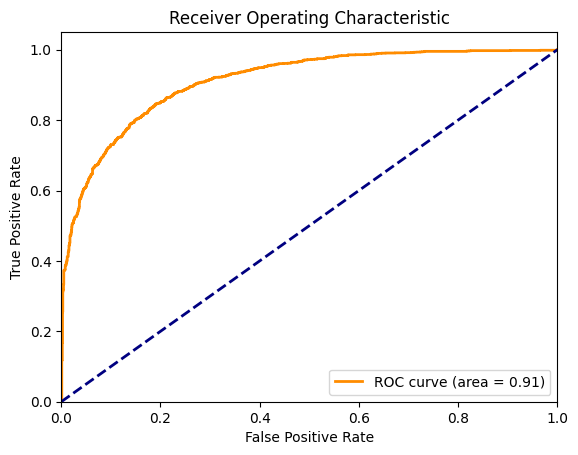

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assume that y_test are the true labels, and y_score are the predicted scores
y_score = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

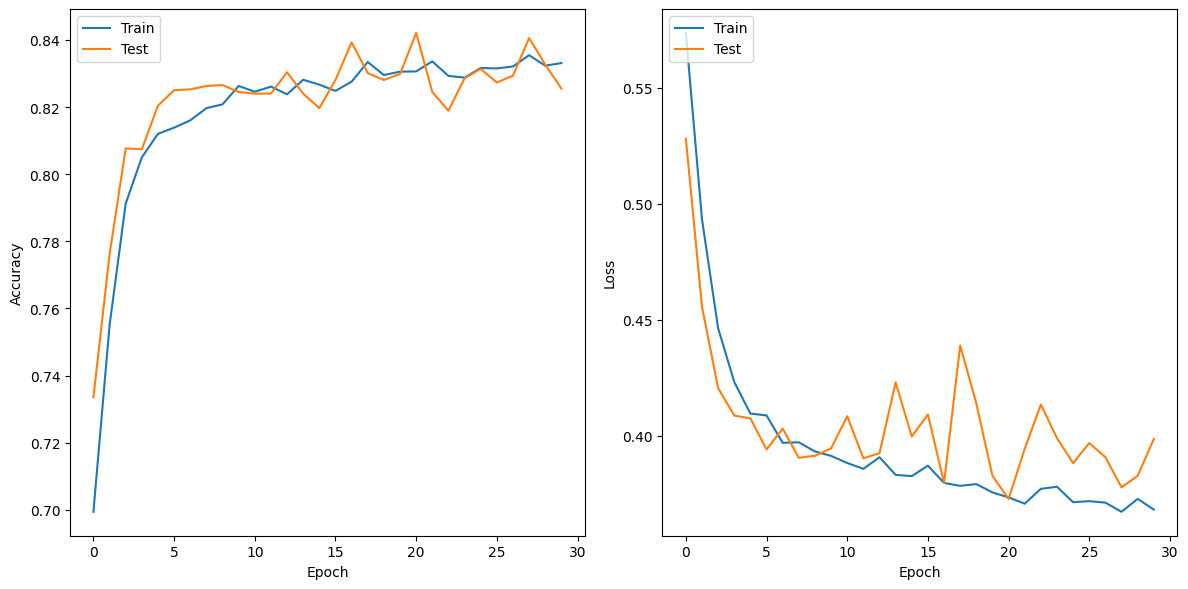

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Visualizing Averaged EEG Epochs: Correct vs. Misclassified Samples

The next cell selects and visualizes two EEG epochs: one from a correctly classified sample and another from a misclassified sample. The average() function is used to compute the average brain activity across all time points within a selected epoch, providing a clearer view of overall brain activity.

This process helps highlight differences in brain activity between correctly and incorrectly classified samples, potentially giving insights into what patterns the model is struggling with.

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


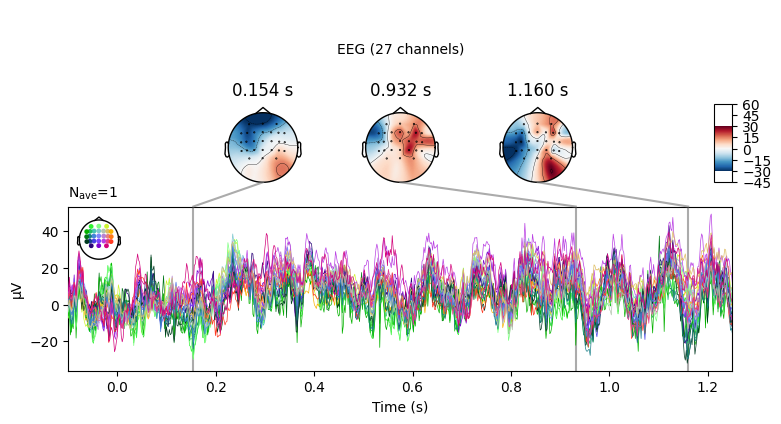

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
No projector specified for this dataset. Please consider the method self.add_proj.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


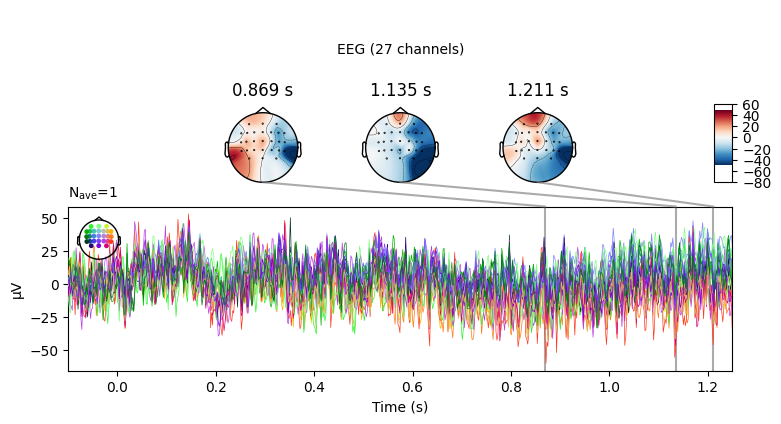

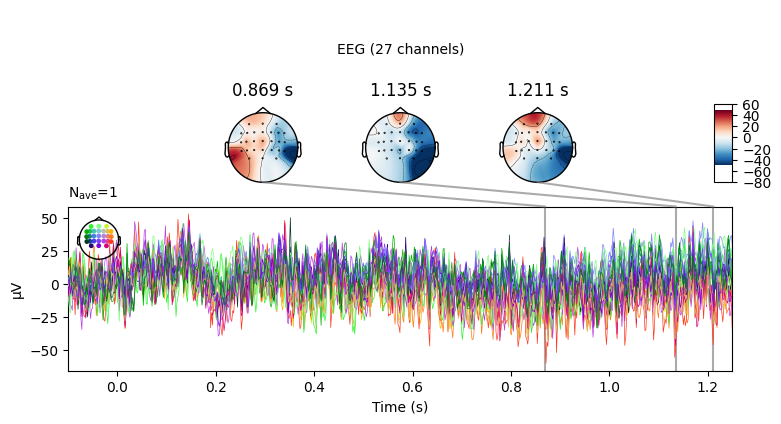

In [ ]:
# Average the single epoch
i= index = correct_indices[100]
single_epoch_avg = epochs[i].average()

# Now plot using plot_joint
single_epoch_avg.plot_joint()


# Average the single epoch
i2= mistake_indices[100]
single_epoch_avg2 = epochs[i2].average()

# Now plot using plot_joint
single_epoch_avg2.plot_joint()

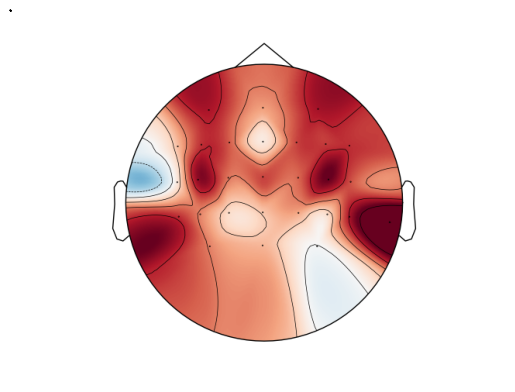

In [ ]:

# Plot a single epoch at index i:
i = mistake_indices[200]  # for example
epoch = epochs[i]

# Average over the time dimension to get a single 2D map
avg = np.mean(epoch.get_data(), axis=2)

# Create a topographic plot
fig, ax = plt.subplots()
img, _ = mne.viz.plot_topomap(avg[0], epoch.info, axes=ax, show=False)
fig.canvas.draw()

# Save the figure to a numpy array
topo_map = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
topo_map = topo_map.reshape(fig.canvas.get_width_height()[::-1] + (3,))


plt.imshow(topo_map)
plt.show()

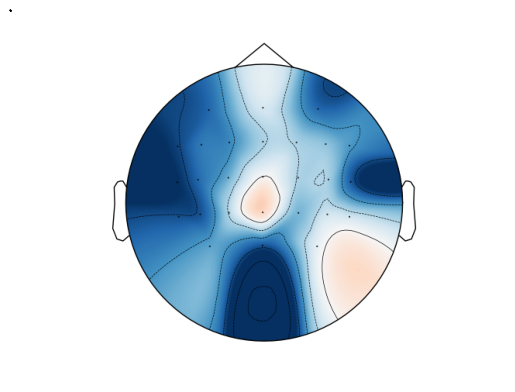

In [ ]:

# plot a single epoch at index i
i = correct_indices[120]  # for example
epoch = epochs[i]

# Average over the time dimension to get a single 2D map
avg = np.mean(epoch.get_data(), axis=2)

# Create a topographic plot
fig, ax = plt.subplots()
img, _ = mne.viz.plot_topomap(avg[0], epoch.info, axes=ax, show=False)
fig.canvas.draw()

# Save the figure to a numpy array
topo_map = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
topo_map = topo_map.reshape(fig.canvas.get_width_height()[::-1] + (3,))


plt.imshow(topo_map)
plt.show()


#### Plot mistakes

In [ ]:
# Generate predictions
y_pred = model.predict(X_test)

# Convert probabilities into class labels
y_pred_labels = (y_pred > 0.5).astype(int)

# Identify indices of correctly classified images
correct_indices = np.where(y_pred_labels.flatten() == y_test)[0]

mistake_indices = np.where(y_pred_labels.flatten() != y_test)[0]

# # Calculate the average of the correct images
# average_correct_image = np.mean(X_test[correct_indices], axis=0)


# Calculate the average of the correct images
#average_correct_image = np.mean(X_test[correct_indices]  , axis=0) #.astype('float32') * 255.0




# # Normalize the data
# topo_maps_for_X = topo_maps[:TRIALS].astype('float32') / 255.0

123/123 [==============================] - 0s 3ms/step


In [ ]:
correct_indices[33]

38

In [ ]:
X_test[index]

array([[ 0.11959615,  0.13117667,  0.20544454, ...,  0.16318098,
         0.05346189,  0.19381075],
       [ 0.02831453,  0.05508577,  0.08849908, ...,  0.06074872,
         0.01911347,  0.06595713],
       [-0.10158624, -0.06804463, -0.1022963 , ..., -0.11771676,
        -0.03968948, -0.11239749],
       ...,
       [-0.42823261, -0.2833077 , -0.36431583, ..., -0.38203681,
        -0.19142646, -0.41053357],
       [-0.49608551, -0.34376657, -0.47262905, ..., -0.48288711,
        -0.21909507, -0.49419046],
       [-0.47536813, -0.32112779, -0.41089052, ..., -0.43381322,
        -0.20311614, -0.41650429]])

Using matplotlib as 2D backend.


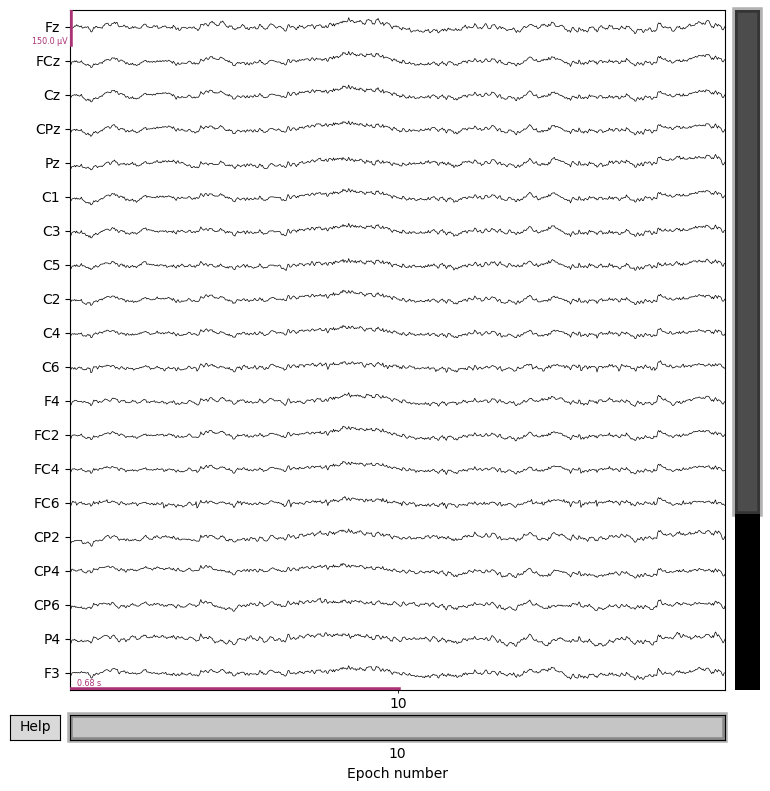

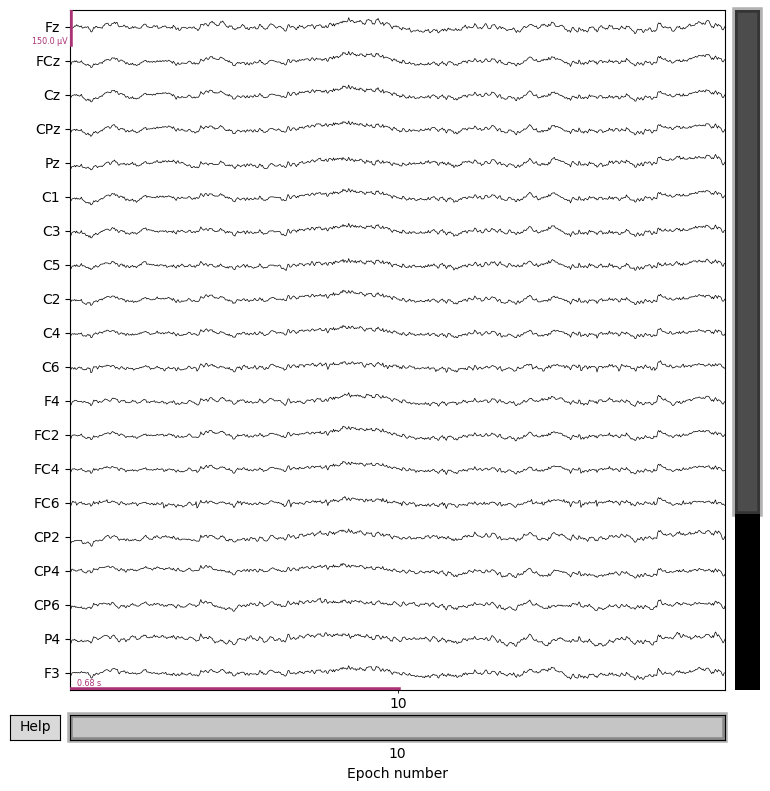

In [ ]:
epochs[1].plot(scalings=dict(eeg=75e-6))

#### optional: uncomment out if you need to free up space in ram

In [ ]:
# 20 to 14, freed 6gb ram

# del X
# del epochs
# import gc
# gc.collect

In [ ]:
#14 to 8 ram. deleted 6GB RAM

# del X_train, X_test, y_train, y_test
# gc.collect

<function gc.collect(generation=2)>